In [77]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

### The Legion of Evil is the world's #2 most evil organization in the world, but we could be number one!
#### Through tough negotiations and uncomfortable silences, we have been granted a meeting with the #1 most evil organization, the Legion of Doom! This is our chance, recruit, to make it to the big time. Let's not fail now!

#### Let's start by loading in our database and printing the head

In [78]:
marvel = pd.read_csv('./../../assets/datasets/marvel.csv')
marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


#### We have some extra data from our teams in the field about the comings and goings of our heroes in the list. Let's run this once and continue to the next field

In [79]:
def randomly(length):
    return np.random.randint(0, length, size = 1)[0]

def pull_unique(length, arr):
    this_rand = randomly(length)
    while this_rand in arr:
        this_rand = randomly(length)
    return this_rand

def make_week(number):
    return "Week: " + str(number)


columns = 35
weeks = [make_week(x + 1) for x in range(columns)]

activity = ["sleeping","jogging","general tcb(taking care of business)",
            "goat wrangling","birthday party","hopscotch tournament",
           "evil fighting","having conflicting emotions about secret identity",
           "ordering pizza","eating jellybeans","working both sides",
            "being john malkovich","Netflix and chill", "munching on granola",
            "standing silently on one leg", "using powers for good", 
            "extensive pullups","running into walls","creating portals to other dimensions",
           "being really really evil", "insulting children", "stealing puppies from orphanages",
           "masticating", "doing magic tricks", "understanding the world", "Space!!!"]

dicty = {}

for week in weeks:
    dicty[week] = [activity[randomly(len(activity))] for x in range(len(marvel))]

dicty['page_id'] = marvel['page_id']

#### Let's add our new data to a dataframe and print the head

In [80]:
weeks = pd.DataFrame(dicty)
weeks.head()

,Week: 1,Week: 10,Week: 11,Week: 12,Week: 13,Week: 14,Week: 15,Week: 16,Week: 17,Week: 18,...,Week: 33,Week: 34,Week: 35,Week: 4,Week: 5,Week: 6,Week: 7,Week: 8,Week: 9,page_id
0,jogging,evil fighting,doing magic tricks,creating portals to other dimensions,birthday party,hopscotch tournament,creating portals to other dimensions,understanding the world,working both sides,hopscotch tournament,...,Space!!!,ordering pizza,goat wrangling,understanding the world,sleeping,hopscotch tournament,creating portals to other dimensions,being john malkovich,evil fighting,1678
1,being john malkovich,masticating,Netflix and chill,jogging,being john malkovich,creating portals to other dimensions,insulting children,having conflicting emotions about secret identity,being john malkovich,working both sides,...,Space!!!,creating portals to other dimensions,masticating,goat wrangling,jogging,being john malkovich,munching on granola,using powers for good,stealing puppies from orphanages,7139
2,birthday party,masticating,jogging,goat wrangling,birthday party,standing silently on one leg,extensive pullups,sleeping,ordering pizza,insulting children,...,extensive pullups,stealing puppies from orphanages,eating jellybeans,hopscotch tournament,understanding the world,birthday party,jogging,evil fighting,insulting children,64786
3,eating jellybeans,general tcb(taking care of business),ordering pizza,eating jellybeans,evil fighting,eating jellybeans,being really really evil,extensive pullups,running into walls,munching on granola,...,extensive pullups,ordering pizza,eating jellybeans,having conflicting emotions about secret identity,being really really evil,standing silently on one leg,ordering pizza,insulting children,hopscotch tournament,1868
4,general tcb(taking care of business),munching on granola,goat wrangling,insulting children,insulting children,being really really evil,having conflicting emotions about secret identity,extensive pullups,evil fighting,standing silently on one leg,...,evil fighting,standing silently on one leg,working both sides,hopscotch tournament,understanding the world,hopscotch tournament,eating jellybeans,working both sides,creating portals to other dimensions,2460


#### Let's merge new this DataFrame with our marvel DataFrame

In [81]:
merged = pd.merge(marvel, weeks, how="inner", on="page_id")

#### Let's take a look at our data to see how it came out. General Immortus tells you that "Ormond Wychwood" should be in our database, let's print out his data.

In [82]:
merged[merged.name.str.contains('Ormond Wychwood')]

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,...,Week: 32,Week: 33,Week: 34,Week: 35,Week: 4,Week: 5,Week: 6,Week: 7,Week: 8,Week: 9
1016,84720,Ormond Wychwood (Earth-616),\/Ormond_Wychwood_(Earth-616),Secret Identity,Bad Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,...,Netflix and chill,being really really evil,birthday party,masticating,general tcb(taking care of business),masticating,working both sides,insulting children,stealing puppies from orphanages,stealing puppies from orphanages


#### Everything looks good! Next, let's melt our table to find the most popular activity for our heroes by week

In [83]:
year = merged.ix[:,:'Year']
melted_table = pd.melt(merged, id_vars = year.columns.values, var_name = "week", value_name = 'activity')
melted_table.head()


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,week,activity
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0,Week: 1,jogging
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0,Week: 1,being john malkovich
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0,Week: 1,birthday party
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0,Week: 1,eating jellybeans
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0,Week: 1,general tcb(taking care of business)


#### We are concerned about the activities of our valiant evil heroes vs. the unambitious good heroes. Let's print out a pivot table showing the differences. An example table can be found below.

In [84]:
pivot_melted = pd.pivot_table(melted_table, index = ['ALIGN'], columns = ['activity'], aggfunc = 'count', fill_value = 0)

pivot_melted.head()



page_id                                \
activity           Netflix and chill Space!!! being john malkovich   
ALIGN                                                                
Bad Characters                  9056     8977                 8906   
Good Characters                 6260     6144                 6312   
Neutral Characters              2986     2979                 3031   

                                                            \
activity           being really really evil birthday party   
ALIGN                                                        
Bad Characters                         9006           9185   
Good Characters                        6290           6211   
Neutral Characters                     3088           2952   

                                                                            \
activity           creating portals to other dimensions doing magic tricks   
ALIGN                                                                        
Bad Characters                                     9020               8949   
Good Characters                                    6083               6300   
Neutral Characters                                 3023               3006   

                                                                      \
activity           eating jellybeans evil fighting extensive pullups   
ALIGN                                                                  
Bad Characters                  8926          8935              9118   
Good Characters                 6154          6265              6300   
Neutral Characters              2917          2902              2869   

                          ...                week                      \
activity                  ...         masticating munching on granola   
ALIGN                     ...                                           
Bad Characters            ...                9103                9048   
Good Characters           ...                6220                6192   
Neutral Characters        ...                2839                2965   

                                                               \
activity           ordering pizza running into walls sleeping   
ALIGN                                                           
Bad Characters               9110               9013     8909   
Good Characters              6209               6193     6382   
Neutral Characters           3014               3025     2945   

                                                 \
activity           standing silently on one leg   
ALIGN                                             
Bad Characters                             8959   
Good Characters                            6211   
Neutral Characters                         2964   

                                                                             \
activity           stealing puppies from orphanages understanding the world   
ALIGN                                                                         
Bad Characters                                 8962                    9035   
Good Characters                                6269                    6395   
Neutral Characters                             3063                    3017   

                                                             
activity           using powers for good working both sides  
ALIGN                                                        
Bad Characters                      8978               9164  
Good Characters                     6123               6155  
Neutral Characters                  2934               2966  

[3 rows x 338 columns]

#### Are our freedom fighters better at being evil on average? Let's make a boxplot of the number of times each character had an evil action against how they are aligned (evil, neutral, good). You can see a sample of the plot we are looking for below this cell.

In [85]:
evil_activities = ["working both sides","creating portals to other dimensions",
           "being really really evil", "insulting children", "stealing puppies from orphanages"]


new_melted = melted_table[melted_table.activity.isin(evil_activities)][['ALIGN','page_id']]

#new_melted.head()
x = pd.pivot_table(new_melted, index = ['page_id'], columns = ['ALIGN'],aggfunc = len)
x


# new_melted = melted_table[melted_table.activity.isin(evil_activities)][['page_id','ALIGN']]
# #print new_melted.head()

# new = pd.DataFrame(new_melted['page_id'].value_counts().reset_index())
# new.columns = ['page_id', 'count']
# #print new.head()


# final = pd.merge(new_melted,new, how="inner", on="page_id")
# final.drop_duplicates(inplace=True)

# #print final.head()
# print final[['ALIGN','count']].groupby('ALIGN').count()
# #print final.groupby('count').count()


# x.plot(kind='box')
# plt.show()


ALIGN,Bad Characters,Good Characters,Neutral Characters
page_id,,,
1025,7.0,NaN,NaN
1027,8.0,NaN,NaN
1029,NaN,8.0,NaN
1030,NaN,6.0,NaN
1032,6.0,NaN,NaN
1033,5.0,NaN,NaN
1034,6.0,NaN,NaN
1036,NaN,5.0,NaN
1037,9.0,NaN,NaN


![Box](./../../assets/plot_1.png "Box")

#### Now let's make a bar graph with pandas with the averages of the sum totals (evil / all activites) for our alignments. Which alignment on average was the most evil? Don't forget to give your chart a title and label your axis' recruits!

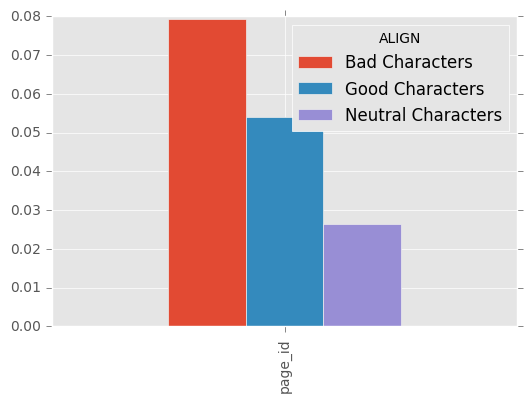

In [86]:
y = pd.pivot_table(new_melted, columns = ['ALIGN'],aggfunc = len)

#print new_melted.head()
y['Bad Characters'] = y['Bad Characters'] / len(melted_table.page_id)
y['Good Characters'] = y['Good Characters'] / len(melted_table.page_id)
y['Neutral Characters'] = y['Neutral Characters'] / len(melted_table.page_id)
y

                                                
#new_melted = melted_table[melted_table.activity.isin(evil_activities)][['ALIGN','page_id']]                                   

#y
y.plot(kind='bar')

plt.show()


![Bar](./../../assets/plot_2.png "Bar")

#### Lex Luther ([Enterprising Leader of the Legion Of Doom](https://en.wikipedia.org/wiki/Legion_of_Doom_(DC_Comics)) has contracted you on one last personal project: To engineer a unique, cutting-edge slideshow for the lobby of the Legion of Doom! Here are the steps needed to complete the task.

* Replace each of your heroes activities with numbers denoting their alignment
    * 1 = good
    * -1 = evil
    * 0 = neutral (all activities not in good_activity or evil_activity lists)
* Pick a random hero from your dataset
* Plot his evilness/goodness over time with a line graph
* Make sure to print his name at the top of the graph and label your x and y axis!

2209
        page_id  week  Activity_Score
674        2209   1.0               1
180810     2209   2.0               0
360946     2209   3.0               0
475578     2209   4.0               1
491954     2209   5.0              -1


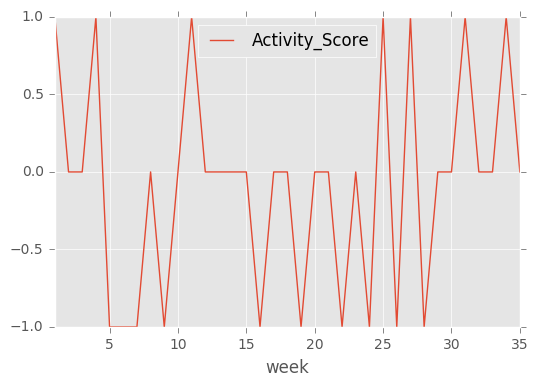

In [116]:
good_activity = ["birthday party","evil fighting",
                 "having conflicting emotions about secret identity",
           "using powers for good", "understanding the world", "Space!!!"]
 
melted_table['Activity_Score'] = pd.Series(0, index = melted_table.index)

melted_table.ix[melted_table.activity.isin(evil_activities),['Activity_Score']] = -1
melted_table.ix[melted_table.activity.isin(good_activity),['Activity_Score']] = 1
                
melted_table.head()
                
ran_num = np.random.randint(len(melted_table))

ran_hero_id = melted_table['page_id'][ran_num]

print ran_hero_id
ran_df = melted_table[melted_table.page_id == ran_hero_id][['page_id','week','Activity_Score']]

ran_df['week'] = melted_table.week.str.replace('Week: ','')
ran_df['week'] = [float(x) for x in ran_df.week.values]
ran_df = ran_df.sort_values('week', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

print ran_df.head()

ran_df.plot(kind='line',x='week',y='Activity_Score')

plt.show()


#mydf['CigarNum'] = mydf['Cigarettes'].apply(numcigar.get).astype(float)



![Bar](./../../assets/plot_3.png "Bar")